# RDA5820N Functional Test 
- https://datasheet.lcsc.com/szlcsc/RDA-Microelectronics-RDA5820NS_C167244.pdf
- http://news.eeworld.com.cn/mcu/article_2017011333300.html

In [1]:
import os, sys

def gen_relative_path(target_path): 
    
    def del_same_parents(target_path, current_path):
        if len(target_path) * len(current_path) > 0:
            if target_path[0] == current_path[0]:
                target_path.pop(0)
                current_path.pop(0)
                del_same_parents(target_path, current_path)
            
    current_path = os.getcwd().replace('\\', '/').split('/')
    target_path = target_path.replace('\\', '/').split('/')
    del_same_parents(target_path, current_path)
    
    return ['..'] * len(current_path) + target_path


def append_source_relative_path(source_relative_path):
    sys.path.append(os.sep.join(source_relative_path))

In [2]:
# paths = [' ']
# paths = [gen_relative_path(p) for p in paths]
# print(paths)

In [3]:
paths =[['..', '..', '..', '..', '..', 'Signal Generators', 'bitbucket', 'github', 'codes'],
        ['..', '..', '..', '..', '..', 'FX2LP', 'bitbucket', 'github', 'codes'], 
        ['..', '..', '..', '..', '..', 'Utilities', 'bitbucket', 'github', 'codes'],
        ['..', '..', 'codes']]

for path in paths:
    append_source_relative_path(path)

In [4]:
%pylab inline
 
from array import array
from utilities.adapters import peripherals
from fm_transceivers import RDA5820N
import fx2lp

Populating the interactive namespace from numpy and matplotlib


## Debug mode?

In [5]:
cls = RDA5820N

cls.DEBUG_MODE_SHOW_BUS_DATA = False         # whether to show bus data. 
cls.DEBUG_MODE_PRINT_REGISTER = False        # whether to print registers. 

## Generators

In [6]:
with_hardware_device = False

if with_hardware_device:
    _i2c = peripherals.I2C.get_Ftdi_i2c()
else:
    _i2c = None  # using None for testing without actual hardware device.
    
bus = peripherals.I2C(_i2c)


****** Virtual device. Data may not be real ! ******



In [7]:
bus = fx2lp.I2C(as_400KHz = True)

In [88]:
# freq = 88.80e6
# freq = 97.7e6

# rda = RDA5820N(bus, freq = 97.7e6, work_mode = 'Receiver', tx_power_dBm = 3)

rda = RDA5820N(bus, freq = 88.8e6, work_mode = 'Transmitter',
               emphasis_us = 75, 
               audio_deviation = 0xFF,
               input_level_v = 0.6, 
               adc_gain = 7, 
               tx_power_dBm = 3,
               volume = 1)

# rda = RDA5820N(bus, work_mode = 'Audio_Amplifier')

initial_registers_values = rda.registers_values

## Noise Level Measurement

In [ ]:
plt.figure(figsize = (15, 5))
 
noise_levels = rda.receiver.scan_noise_levels(freq_start = 88.9e6, freq_end = 90e6, wait_seconds = 0.3)
# noise_levels = rda.receiver.scan_noise_levels()
nl = np.array(noise_levels).T
plt.plot(nl[0] / 1e6, nl[1]);
# plt.bar(nl[0] / 1e6, nl[1], orientation = 'vertical');

In [ ]:
noise_levels_sorted = sorted(noise_levels, key = lambda x: x[1])
noise_levels_sorted

## RDS

In [18]:
# rda.rds.set_rds(program_id = 0x0520,
#                 station_name = "Wei Lin",
#                 radio_text = "My Radio Station !",
#                 program_type_code = 4,
#                 repeat_count = 3, message_count = 1, rds_mix_ratio = 50,  
#                 rds_fifo_size = 20,
#                 enable = True)

In [19]:
# while True:
#     rda.rda.set_rds_buffer(message = time.strftime("%Y-%m-%d %H:%M:%S"), use_FIFO = True)
#     time.sleep(10)

In [20]:
# rda.rda.set_rds(enable = False)

## Member functions test

In [10]:
# for f in dir(RDA5820N):
#     if not f.startswith('_'):
#         if f.islower():
#             if callable(getattr(RDA5820N, f)):
#                 print('rda.{}()'.format(f))

In [11]:
# rda.apply_signal()

In [12]:
rda.dsp._enable_soft_blend(False)

In [13]:
rda.close()

In [14]:
rda.enable()

In [15]:
rda.enable_output(False)

In [16]:
rda.enable_output(True)

In [17]:
rda.mute(True)

In [18]:
rda.stereo = False
rda.stereo

False

In [19]:
rda.stereo = True
rda.stereo

True

In [20]:
rda.mute(False)

In [21]:
rda.pause()

In [22]:
rda.resume()

In [23]:
rda.reset()

In [24]:
rda.set_frequency(88.9e6)

In [25]:
rda.set_frequency(88.8e6)

In [26]:
rda.transmitter.set_power(-32)

In [27]:
rda.transmitter.set_power(3)

In [28]:
rda.init()

In [29]:
rda.set_work_mode('Audio_Amplifier')

In [30]:
rda.set_work_mode(mode = 'Transmitter')
rda.tuner.set_frequency(88.8e6)

In [31]:
rda.set_work_mode('Receiver')
rda.tuner.set_frequency(97.7e6)

In [32]:
rda.start()

In [33]:
rda.stop()

In [34]:
rda.toggle()

In [35]:
rda.update()

In [36]:
rda.write_all_registers()

In [37]:
rda.print_register_by_address(5)


<< 0x05 >>         :  ('0x8881', '0b1000100010000001')
[ INT_MODE ]     :  1
[ SEEK_MODE ]    :  0
[ Reserved_12 ]  :  0
[ SEEKTH ]       :  8
[ LNA_PORT_SEL ] :  2
[ Reserved_4 ]   :  0
[ VOLUME ]       :  1


In [38]:
rda.read_all_registers()

[(0, '0x00', 22560),
 (2, '0x02', 53761),
 (3, '0x03', 6848),
 (4, '0x04', 17408),
 (5, '0x05', 34945),
 (6, '0x06', 2048),
 (7, '0x07', 24260),
 (10, '0x0A', 16491),
 (11, '0x0B', 1551),
 (12, '0x0C', 0),
 (13, '0x0D', 0),
 (14, '0x0E', 0),
 (15, '0x0F', 0),
 (64, '0x40', 0),
 (65, '0x41', 2367),
 (103, '0x67', 3600),
 (104, '0x68', 4095)]

In [39]:
rda.print()


<< 0x00 >>   :  ('0x5820', '0b101100000100000')
[ CHIPID ] :  22560

<< 0x02 >>                    :  ('0xd201', '0b1101001000000001')
[ DHIZ ]                    :  1
[ DMUTE ]                   :  1
[ MONO ]                    :  0
[ BASS ]                    :  1
[ RCLK_NON_CALIBRATE_MODE ] :  0
[ RCLK_DIRECT_INPUT_MODE ]  :  0
[ SEEKUP ]                  :  1
[ SEEK ]                    :  0
[ SKMODE ]                  :  0
[ CLK_MODE ]                :  0
[ RDS_EN ]                  :  0
[ Reserved_2 ]              :  0
[ SOFT_RESET ]              :  0
[ ENABLE ]                  :  1

<< 0x03 >>        :  ('0x1ac0', '0b1101011000000')
[ CHAN ]        :  107
[ DIRECT_MODE ] :  0
[ TUNE ]        :  0
[ BAND ]        :  0
[ SPACE ]       :  0

<< 0x04 >>         :  ('0x4400', '0b100010000000000')
[ RDSIEN ]       :  0
[ STCIEN ]       :  1
[ RBDS ]         :  0
[ RDS_FIFO_EN ]  :  0
[ DE ]           :  0
[ RDS_FIFO_CLR ] :  1
[ SOFTMUTE_EN ]  :  0
[ AFCD ]         :  0
[ Reserved_7

## Registers values of default configuration

In [40]:
DEFAULT_REGISTERS_VALUES = [(0, 22560), (2, 53761), (3, 1168), (4, 17408), (5, 34945), (6, 2048), (7, 24260), (10, 18), (11, 0), (12, 22560), (13, 22560), (14, 22533), (15, 22533), (64, 0), (65, 2367), (103, 3600), (104, 8191)]

In [41]:
rda.init()
initial_registers_values = rda.registers_values

In [42]:
rda.read_all_registers()
read_back_registers_values = rda.registers_values

In [43]:
df = rda.map.compare_values_sets_pd(initial_registers_values, DEFAULT_REGISTERS_VALUES)
df[df.different == 1]

,register,address,default_value,element_name,idx_lowest_bit,n_bits,read_only,value,value_2,different
85,0x68,104,4095,FMTX_PGA_GAIN,11,3,False,1,3,1


In [44]:
df = rda.map.compare_values_sets_pd(initial_registers_values, read_back_registers_values)
df[df.different == 1]

,register,address,default_value,element_name,idx_lowest_bit,n_bits,read_only,value,value_2,different
17,0x03,3,0,TUNE,4,1,False,1,0,1
42,0x06,6,2048,SW_LR,11,1,False,1,0,1
59,0x0A,10,1024,STC,14,1,False,0,1,1
65,0x0B,11,0,RSSI,9,7,False,0,1,1
70,0x0B,11,0,BLERA,2,2,False,0,3,1
71,0x0B,11,0,BLERB,0,2,False,0,3,1
72,0x0C,12,22560,RDSA,0,16,False,22560,0,1
73,0x0D,13,22560,RDSB,0,16,False,22560,0,1
74,0x0E,14,22533,RDSC,0,16,False,22533,0,1
75,0x0F,15,22533,RDSD,0,16,False,22533,0,1


## Logarithmic equation of PA gains

In [45]:
rda.PA_GAINS

{3: 63, 0: 39, -1.47: 32, -3: 25, -32: 0}

In [46]:
s = [[v,k] for k, v in rda.PA_GAINS.items()]
values = [v[0] for v in s]
dbs = [v[1] for v in s]

In [47]:
values[-1] = 1e-19
values, dbs

([63, 39, 32, 25, 1e-19], [3, 0, -1.47, -3, -32])

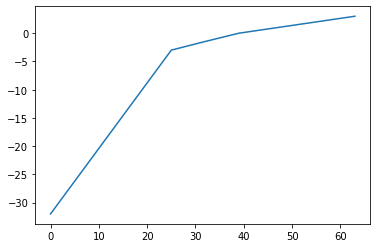

In [48]:
plt.plot(values, dbs);

#### Manual Interpolate

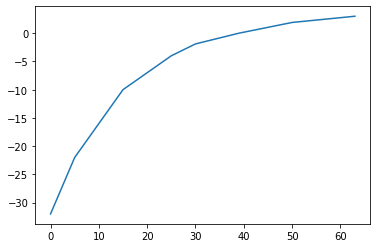

In [49]:
values = [63, 50, 39,   30, 25, 15,  10,   5, 1e-19]
dbs =    [ 3,  1.9,  0, -1.9, -4,-10, -16, -22,   -32]

plt.plot(values, dbs);

### Poly

In [50]:
order = 4
pl = np.polyfit(values, dbs, order)

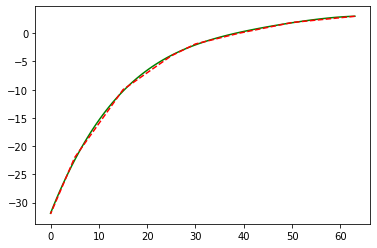

In [51]:
x = np.linspace(1e-19, 63, 100)
y = np.polyval(pl, x) 
plt.plot(x, y, 'g-');
plt.plot(values, dbs, 'r--');

### dBm when PA_GAIN is 32

In [52]:
np.polyval(pl, 32)

-1.4708637593712304

### Logarithmic
doesn't look good

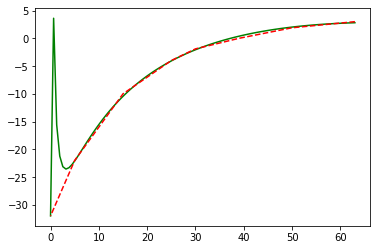

In [53]:
pl = np.polyfit(np.log(values), dbs, order)
y = np.polyval(pl, np.log(x))
plt.plot(x, y, 'g-');
plt.plot(values, dbs, 'r--');

### dBm when PA_GAIN is 32

In [54]:
np.polyval(pl, np.log(32))

-1.4048498922700041